<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/MLPByClass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn pandas

import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2952 sha256=5398fead4558a6fab9ac791300fd50560d98dad213dba509b43a30203487a139
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn
Mounted at /content/drive


In [2]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set_1.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set_1.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB_1.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB_1.csv")

In [3]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=2, average='macro', threshold=0.5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 11.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
#***import requirements***#
#-------------------------#
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.constraints import max_norm
from keras.callbacks import ModelCheckpoint
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/new_df/best_model_by_class1.hdf5"

In [5]:
#***Build Model***#
#-----------------#
model = Sequential()

model.add(Dense(100, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add(Dense(80, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(60, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(40, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(20, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=1,save_best_only=True, mode='auto', period=1)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               8500      
                                                                 
 dense_1 (Dense)             (None, 80)                8080      
                                                                 
 dense_2 (Dense)             (None, 60)                4860      
                                                                 
 dense_3 (Dense)             (None, 40)                2440      
                                                                 
 dense_4 (Dense)             (None, 20)                820       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 24,721
Trainable params: 24,721
Non-traina

Streaming output truncated to the last 5000 lines.
2/3 [===================>..........] - ETA: 0s - loss: 0.3630 - accuracy: 0.8208
Epoch 8752: loss did not improve from 0.35460
3/3 [==============================] - 0s 81ms/step - loss: 0.3644 - accuracy: 0.8183 - val_loss: 0.3874 - val_accuracy: 0.7696
Epoch 8753/10000
2/3 [===================>..........] - ETA: 0s - loss: 0.4209 - accuracy: 0.7858
Epoch 8753: loss did not improve from 0.35460
3/3 [==============================] - 0s 77ms/step - loss: 0.4166 - accuracy: 0.7888 - val_loss: 0.4859 - val_accuracy: 0.7145
Epoch 8754/10000
2/3 [===================>..........] - ETA: 0s - loss: 0.3725 - accuracy: 0.8130
Epoch 8754: loss did not improve from 0.35460
3/3 [==============================] - 0s 93ms/step - loss: 0.3752 - accuracy: 0.8118 - val_loss: 0.6709 - val_accuracy: 0.5719
Epoch 8755/10000
2/3 [===================>..........] - ETA: 0s - loss: 0.3651 - accuracy: 0.8135
Epoch 8755: loss did not improve from 0.35460
3/3 [=

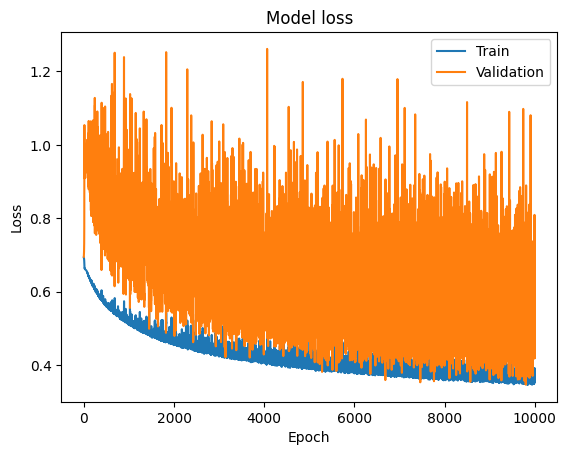



*********************************************




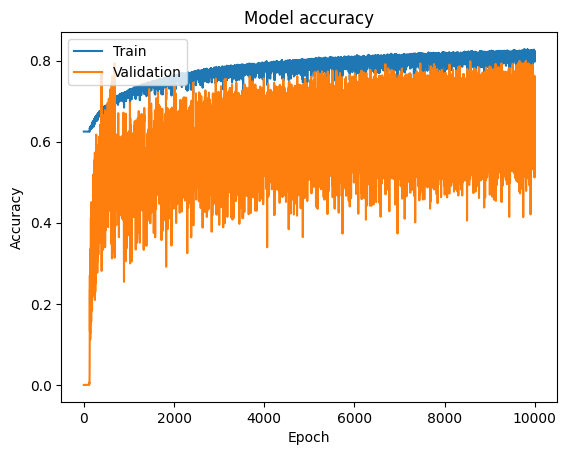



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 3ms/step - loss: 2.2007 - accuracy: 0.5358
[2.200653314590454, 0.5358083844184875]
131/131 [==============================] - 0s 2ms/step
Report for test set:

               precision    recall  f1-score   support

   class 0_2       0.65      0.70      0.67      2848
     class 1       0.22      0.17      0.19      1327

    accuracy                           0.54      4175
   macro avg       0.43      0.44      0.43      4175
weighted avg       0.51      0.54      0.52      4175



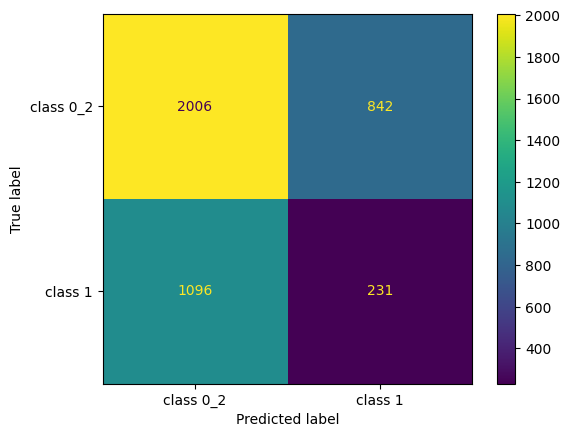



*********************************************
Train-set evaluate result:

712/712 [==============================] - 2s 2ms/step - loss: 0.4646 - accuracy: 0.7411
[0.46455439925193787, 0.7411113977432251]
712/712 [==============================] - 1s 2ms/step
Report for train set:

               precision    recall  f1-score   support

   class 0_2       0.68      0.92      0.78     11391
     class 1       0.88      0.56      0.68     11391

    accuracy                           0.74     22782
   macro avg       0.78      0.74      0.73     22782
weighted avg       0.78      0.74      0.73     22782



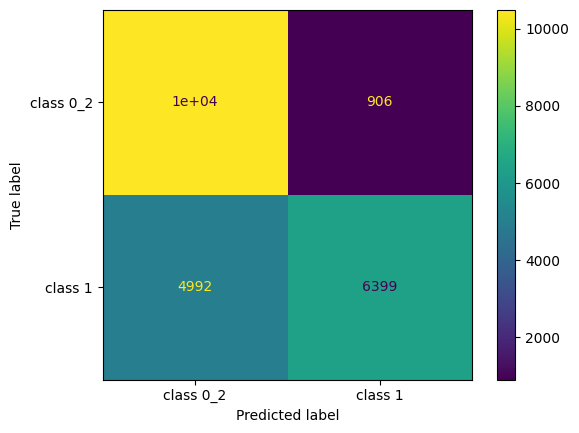

In [6]:
history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 8224, epochs = 10000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0_2', 'class 1']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction =(test_prediction_points > 0.5).astype(numpy.int32)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=target_names)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction =(train_prediction_points > 0.5).astype(numpy.int32)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=target_names)
train_disp.plot()
plt.show()

Streaming output truncated to the last 5000 lines.
2/3 [===================>..........] - ETA: 0s - loss: 0.4960 - accuracy: 0.7510
Epoch 3752: loss did not improve from 0.32941
3/3 [==============================] - 0s 102ms/step - loss: 0.4827 - accuracy: 0.7579 - val_loss: 0.3581 - val_accuracy: 0.7713
Epoch 3753/5000
2/3 [===================>..........] - ETA: 0s - loss: 0.4914 - accuracy: 0.7578
Epoch 3753: loss did not improve from 0.32941
3/3 [==============================] - 0s 89ms/step - loss: 0.4777 - accuracy: 0.7645 - val_loss: 0.3559 - val_accuracy: 0.7900
Epoch 3754/5000
2/3 [===================>..........] - ETA: 0s - loss: 0.4459 - accuracy: 0.7732
Epoch 3754: loss did not improve from 0.32941
3/3 [==============================] - 0s 91ms/step - loss: 0.4400 - accuracy: 0.7760 - val_loss: 0.4375 - val_accuracy: 0.7446
Epoch 3755/5000
2/3 [===================>..........] - ETA: 0s - loss: 0.3713 - accuracy: 0.8131
Epoch 3755: loss did not improve from 0.32941
3/3 [===

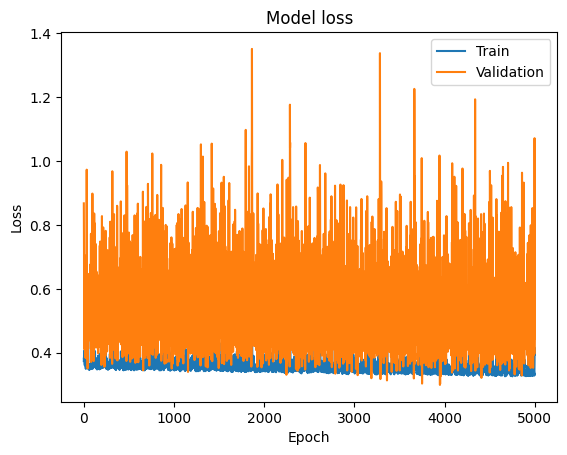



*********************************************




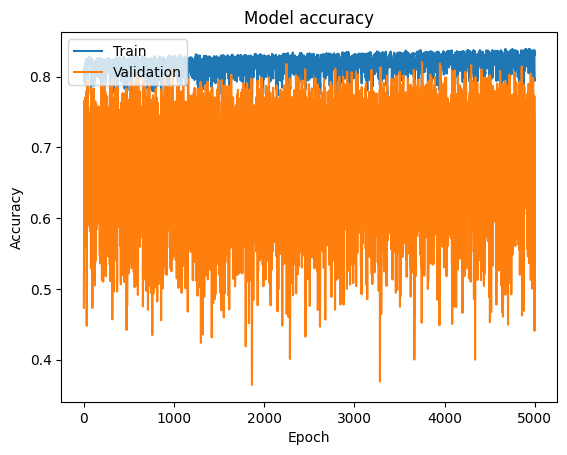



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 3ms/step - loss: 2.2428 - accuracy: 0.4989
[2.242753505706787, 0.4989221692085266]
131/131 [==============================] - 0s 3ms/step
Report for test set:

               precision    recall  f1-score   support

   class 0_2       0.64      0.62      0.63      2848
     class 1       0.23      0.24      0.23      1327

    accuracy                           0.50      4175
   macro avg       0.43      0.43      0.43      4175
weighted avg       0.51      0.50      0.50      4175



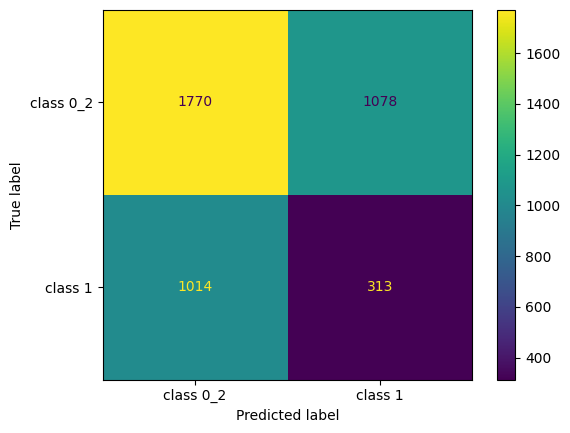



*********************************************
Train-set evaluate result:

712/712 [==============================] - 2s 3ms/step - loss: 0.3718 - accuracy: 0.8074
[0.3717667758464813, 0.8074356913566589]
712/712 [==============================] - 1s 2ms/step
Report for train set:

               precision    recall  f1-score   support

   class 0_2       0.77      0.87      0.82     11391
     class 1       0.85      0.75      0.80     11391

    accuracy                           0.81     22782
   macro avg       0.81      0.81      0.81     22782
weighted avg       0.81      0.81      0.81     22782



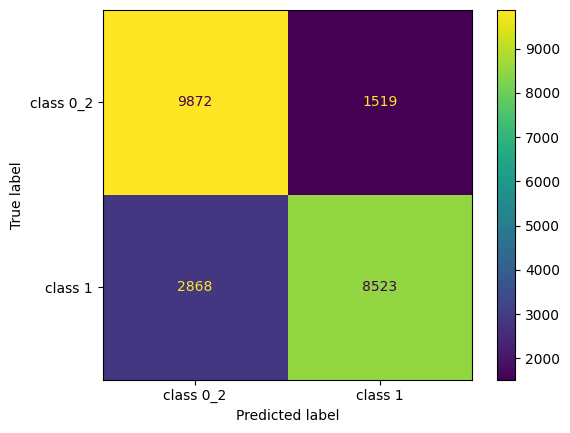

In [7]:
#***Model Continue Learning***#
#------------------------------#

model.load_weights(file_path)

history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 8224, epochs = 5000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0_2', 'class 1']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction =(test_prediction_points > 0.5).astype(numpy.int64)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=target_names)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction =(train_prediction_points > 0.5).astype(numpy.int64)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=target_names)
train_disp.plot()
plt.show()

In [8]:
checkpoint.best

0.3257596492767334



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 2ms/step - loss: 2.3065 - accuracy: 0.5092
[2.306478261947632, 0.5092215538024902]
131/131 [==============================] - 0s 1ms/step
Report for test set:

               precision    recall  f1-score   support

   class 0_2       0.64      0.65      0.64      2848
     class 1       0.22      0.21      0.21      1327

    accuracy                           0.51      4175
   macro avg       0.43      0.43      0.43      4175
weighted avg       0.50      0.51      0.51      4175



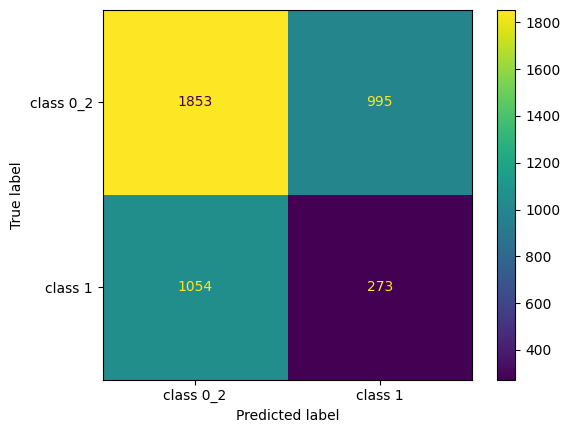



*********************************************
Train-set evaluate result:

712/712 [==============================] - 1s 2ms/step - loss: 0.3603 - accuracy: 0.8089
[0.36029955744743347, 0.8088842034339905]
712/712 [==============================] - 1s 1ms/step
Report for train set:

               precision    recall  f1-score   support

   class 0_2       0.76      0.90      0.83     11391
     class 1       0.88      0.71      0.79     11391

    accuracy                           0.81     22782
   macro avg       0.82      0.81      0.81     22782
weighted avg       0.82      0.81      0.81     22782



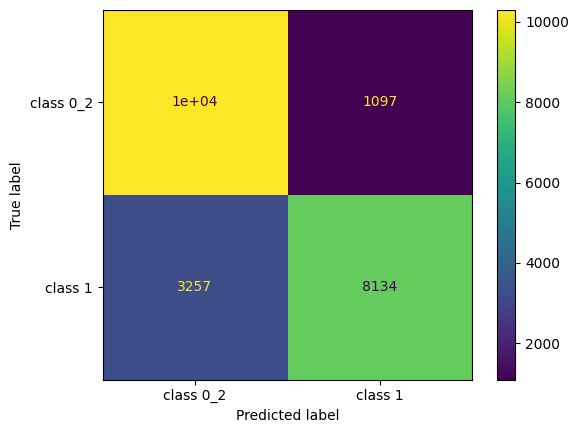

In [9]:
#***Best Model Test Only***#
#--------------------------#

model.load_weights(file_path)

############Pridecting results show######################

target_names = ['class 0_2', 'class 1']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction =(test_prediction_points > 0.5).astype(numpy.int32)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=target_names)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction =(train_prediction_points > 0.5).astype(numpy.int32)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=target_names)
train_disp.plot()
plt.show()

In [10]:
model.save("/content/drive/MyDrive/new_df/best_model_by_class1")